# Homework (15 pts) - Classification

## Nisha Dalal nd8288

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
# Questions are based on the mouse cortex protein expression level dataset used in lecture.
# The Data_Cortex_Nuclear.csv file is available in the same folder as this notebook
# or at https://www.kaggle.com/ruslankl/mice-protein-expression
import pandas as pd
mice = pd.read_csv('Data_Cortex_Nuclear.csv')
mice

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


---
1. (3 pts) Remove mice/samples with missing measurements from the dataframe. Store the result in the mice variable for use with subsequent questions.

In [3]:
mice = mice.dropna()

---
2. (3 pts) Use both logistic regression and a random forest to classify the mice as either memantine or saline treated based on their protein expression profiles. Contrast the overall accuracy of the two classifiers on a withheld test set. You can ignore any warnings similar to those seen in the lecture for the purposes of this assignment, not that you should ignore these for a real analysis.

In [4]:
# Logistic Regression

X = mice.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = mice['Treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

model_LR = LogisticRegression()
warnings.filterwarnings('ignore')
model_LR.fit(X_train, y_train)

y_test_pred_LR = model_LR.predict(X_test)

lr_trt_accuracy = model_LR.score(X_test, y_test)

In [5]:
# Random Forest

model_RF = RandomForestClassifier(n_estimators=100, random_state=1)
model_RF.fit(X_train, y_train)

y_test_pred_RF = model_RF.predict(X_test)

rf_trt_accuracy = accuracy_score(y_test, y_test_pred_RF)

In [6]:
print(f"LR Accuracy: {lr_trt_accuracy :.3f}\nRF Accuracy: {rf_trt_accuracy :.3f}")

LR Accuracy: 0.887
RF Accuracy: 0.968


---
3. (3 pts) For the two classifiers trained in #2 above, contrast their confusion matrices based on predictions for a withheld test set.

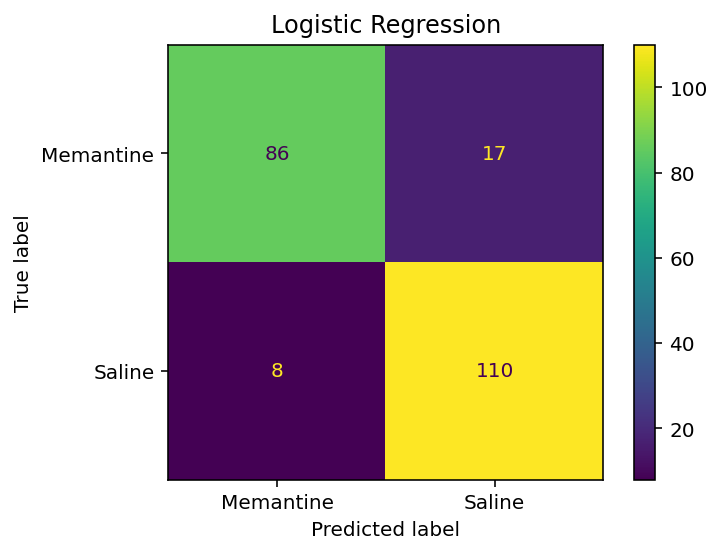

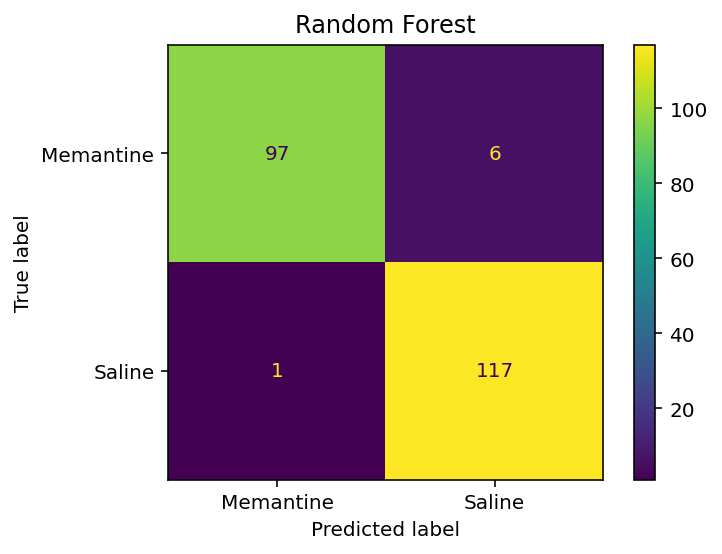

In [7]:
cm_LR = confusion_matrix(y_test, y_test_pred_LR) #create matrix
cm_RF = confusion_matrix(y_test, y_test_pred_RF) #create matrix

lr_trt_cmd = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=model_LR.classes_)
rf_trt_cmd = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=model_RF.classes_)

plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1)
lr_trt_cmd.plot(ax=ax)
plt.title('Logistic Regression')
plt.show()

plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,2)
rf_trt_cmd.plot(ax=ax)
plt.title('Random Forest')
plt.show()

---
4. (3 pts) For the two classifiers trained in #2 above, contrast their ROC curves based on predictions for Memantine treatment in withheld test set.

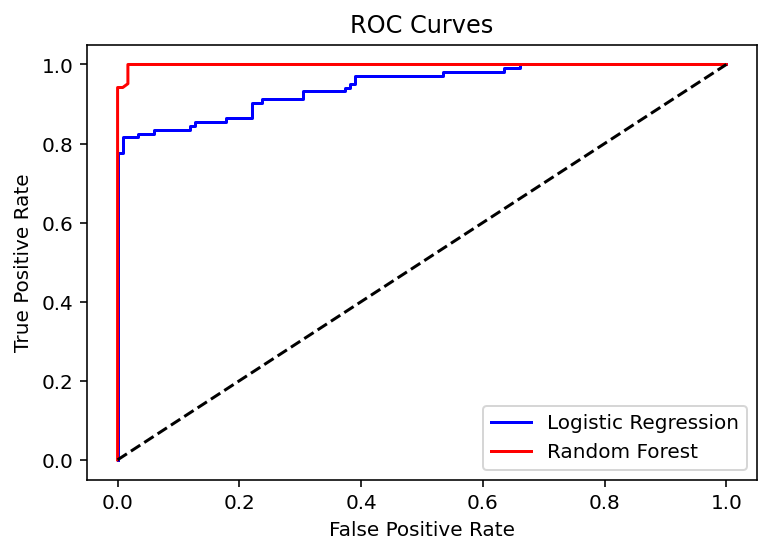

In [8]:
y_test_prob_LR = model_LR.predict_proba(X_test) #gets probabilities 
lr_trt_fpr, lr_trt_tpr, thresholds = roc_curve(y_test, y_test_prob_LR[:,0], pos_label=model_LR.classes_[0]) 

y_test_prob_RF = model_RF.predict_proba(X_test)
rf_trt_fpr, rf_trt_tpr, thresholds = roc_curve(y_test, y_test_prob_RF[:,0], pos_label=model_RF.classes_[0])

plt.plot(lr_trt_fpr, lr_trt_tpr, color='b', label='Logistic Regression')
plt.plot(rf_trt_fpr, rf_trt_tpr, color='r', label='Random Forest')
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

---
5. (3 pts) Use a random forest to classify the mice into each of the 8 classes defined by genotype, fear conditioning and treatment based on their protein expression profiles. Repeat this classification 77 separate times, where on the ith time you will use only the first i proteins. For example, the 1st time you will only use expression of DYRK1A_N, the 2nd time you will use both DYRK1A_N and ITSN1_N as predictive features, the 3rd time DYRK1A_N, ITSN1_N and BDNF_N, etc. until the 77th time you will use all 77 proteins from DYRK1A_N to CaNA_N. Plot the accuracy of the classifier on a withheld test set as a function of the number of protein features used as predictors.

In [9]:
X = mice.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = mice['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
    
model_RF = RandomForestClassifier(n_estimators=100, random_state=1) #create our model, tell it how many estimators we want

accuracy = np.zeros(78)
for i in range(0, 77):
    i +=1
    X_train_i = X_train.iloc[:, 0:i]
    X_test_i = X_test.iloc[:, 0:i]
    model_RF.fit(X_train_i, y_train) #fit
    y_test_pred_RF = model_RF.predict(X_test_i) #get predictions
    accuracy[i] = accuracy_score(y_test, y_test_pred_RF)
    
accuracy = accuracy[1:]

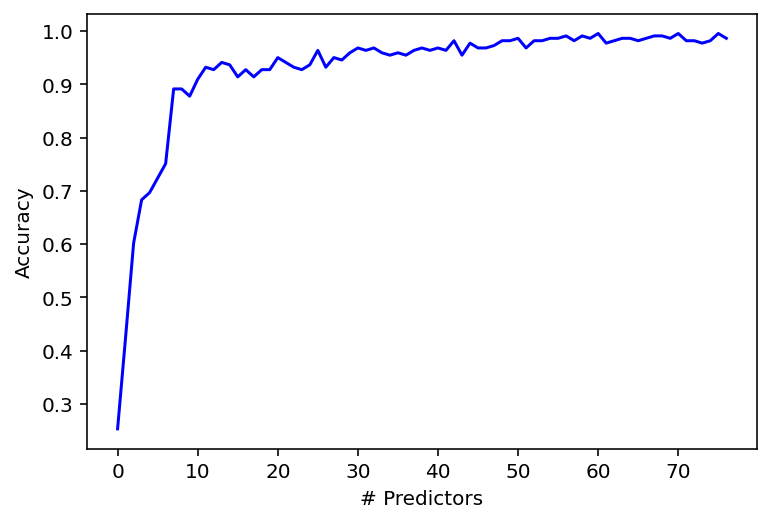

In [10]:
plt.plot(range(77), accuracy, color='b')
plt.xlabel('# Predictors')
plt.ylabel('Accuracy')
plt.show()